In [411]:
from os.path import join
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import h5py
try:
    import GSHEWaveform
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import GSHEWaveform
import utils
from glob import glob
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [412]:
%matplotlib inline

## $\beta/M$ plots

$\lambda_{\rm eff}$ in meters

**WHAT DOES p5 MEAN, WHY DOES IT GIVE STRANGE PARAMETERS!**

In [416]:
loaddir = "/Users/stiskalek/Data/gshe_liv_alpha0/"

loaddir = '/home/miguel/code/notebooks/gw_data/liv_alpha0/'
#loaddir = '/home/miguel/Dropbox/Projects/AGN_strong_field_lensing_birefringence/liv_alpha0/'

files, names_all = utils.get_liv_fnames(loaddir)
print(files)
#files[has('plus')]

['liv_S190814bv_Aminus_alpha0.h5', 'liv_S190814bv_Aplus_alpha0.h5', 'liv_S190828l_Aplus_alpha0.h5', 'liv_S190924h_Aplus_alpha0.h5', 'liv_S190828l_Aminus_alpha0.h5', 'liv_S190727h_Aminus_alpha0.h5', 'liv_S190915ak_Aplus_alpha0.h5', 'liv_S190910s_Aminus_alpha0.h5', 'liv_S190707q_Aminus_alpha0.h5', 'liv_S190707q_Aplus_alpha0.h5', 'liv_S190828j_Aplus_alpha0.h5', 'liv_S190915ak_Aminus_alpha0.h5', 'liv_S190708ap_Aminus_alpha0.h5', 'liv_S190630ag_Aminus_alpha0.h5', 'liv_S190706ai_Aplus_alpha0.h5', 'liv_S190727h_Aplus_alpha0.h5', 'liv_S190720a_Aminus_alpha0.h5', 'liv_S190720a_Aplus_alpha0.h5', 'liv_S190924h_Aminus_alpha0.h5', 'liv_S190728q_Aminus_alpha0.h5', 'liv_S190706ai_Aminus_alpha0.h5', 'liv_S190828j_Aminus_alpha0.h5', 'liv_S190708ap_Aplus_alpha0.h5', 'liv_S190910s_Aplus_alpha0.h5', 'liv_S190728q_Aplus_alpha0.h5']


In [404]:
d = h5py.File(loaddir+'liv_S190814bv_Aplus_alpha0.h5','r')
d.keys()
d['Aplus_alpha0'].keys()

<KeysViewHDF5 ['approximant', 'calibration_envelope', 'config_file', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']>

In [405]:
d['Aplus_alpha0']['config_file'].keys()
s = np.copy(d['Aplus_alpha0']['posterior_samples'])

s['luminosity_distance']*10**s["log10lambda_eff"]

array([1.24605769e+22, 1.04829540e+20, 5.31716382e+26, ...,
       5.58350068e+25, 1.82240814e+26, 6.04349073e+18])

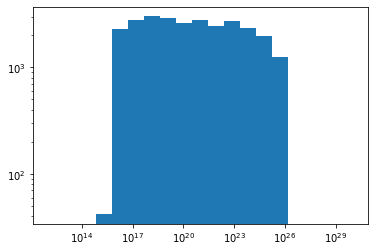

In [406]:
l_eff = 10**s["log10lambda_eff"]
plt.hist(l_eff,np.geomspace(1e12,1e30,20))
plt.yscale('log')
plt.xscale('log')

(array([  16.,  216.,  790., 1261., 2279., 4210., 7212., 8374., 2615.,
         153.]),
 array([102.63799701, 131.40819228, 160.17838756, 188.94858284,
        217.71877812, 246.48897339, 275.25916867, 304.02936395,
        332.79955922, 361.5697545 , 390.33994978]),
 <a list of 10 Patch objects>)

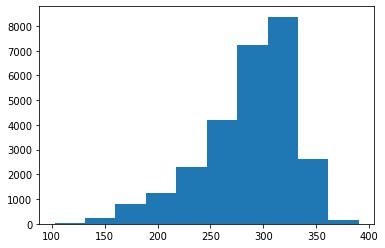

In [407]:
plt.hist(s["luminosity_distance"])

In [370]:
l_eff_typical = np.quantile(l_eff,0.05)*u.m
DL_typical = np.median(s["luminosity_distance"])*u.Mpc
A0_typical = ((c.h*c.c/(l_eff_typical)).to(u.eV))**2
A0_typical

<Quantity 2.55398007e-45 eV2>

In [402]:
print('beta /GM')
((A0_typical*(DL_typical)/c.c**1/c.h**2)).decompose()

beta /GM


<Quantity 4.54499517 1 / s>

In [419]:
print('beta max (M/Msun)')
(A0_typical*(DL_typical)/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta max (M/Msun)


<Quantity 2.23863326e-05>

In [399]:
print('beta/GM max (dimensionless)')
((A0_typical*(DL_typical))*c.G/c.c**6).decompose()

beta/GM max (dimensionless)


<Quantity 5.4998101e-119 kg m2>

In [322]:
((c.h*c.c/(l_eff_typical*u.m))/u.eV).decompose()

<Quantity 1.23984198e-34>

In [436]:
#importlib.reload(utils)

beta_over_M_raw = []

names = []
file_names = []
for i, file in enumerate(files):
    btOm = utils.beta_over_M_from_liv_samples(join(loaddir, file))
    if btOm is not None:
        beta_over_M_raw.append(btOm)
        names.append(names_all[i])
        file_names.append(file)



sort = np.argsort(names)
names = [names[i] for i in sort]
file_names = [file_names[i] for i in sort]
beta_over_M_raw = [beta_over_M_raw[i] for i in sort]

#print(beta_over_M)

In [437]:
#print(beta_over_M)
from astropy import units as u
from astropy import constants as c
(u.Mpc*u.peV**2).decompose()

Unit("7.92084e-40 kg2 m5 / s4")

**Notes:**
* 90% and 95\% quantiles are very different!

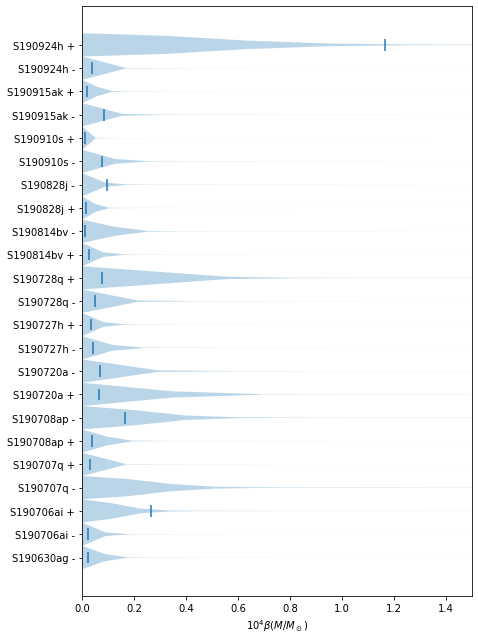

In [477]:
plt.figure(figsize=(9 * 0.75, 9))

#Coefficient from our long paper, eq 4.5
#assumes: luminosity_distance in Mpc, A0 = our c0 and is in ev^2
#NOTE: A0 in peV^2 to eV^2 
#beta_over_M = [bt*(1e-12)**2/(1e-23)**2/1e3*0.148/(5e4) for bt in beta_over_M_raw]

factor = (u.peV**2*u.Mpc/c.c**2/c.h**2*c.G*u.solMass/c.c**2).decompose()

beta_1Msun = [bt*float(factor) for bt in beta_over_M_raw]

colors = ['b' if 'plus' in f else 'r' for f in file_names]
sign = ['+' if 'plus' in f else '-' for f in file_names]

scale = 1e4
#beta_p = [b for]

plt.violinplot(np.abs(beta_1Msun)*scale, showmeans=False, vert=False, showextrema=False, widths=1,quantiles=[[.9] for b in beta_1Msun])#,color=colors)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, [nam+' '+sign[i] for i,nam in enumerate(names)])
plt.xlim(0, 1.5e-4*scale)
#plt.xscale('log')

plt.xlabel(r"$10^4\beta(M/M_\odot)$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

## Constraints

For a given event, the probaility of detecting GSHE is given by

$$p_i= f(M,r_{\rm src}) P_{\rm GSHE}(\beta_{\rm ex}^{i}(M),r_{\rm src}) = f(M,r_{\rm src}) $$

$f$ is the fraction of mergers at a given radius of a BH of a given mass. The second factor is the probability of detecting GSHE, which we take as given by $\frac{1}{2}\Upsilon(\beta_{\rm ex}^i(M),r_{\rm src})$, where $\beta_{\rm ex}^i(M)$ is the maximum allowed value of $\beta$ given by the data (coefficient reflects that $\Upsilon$ only counts the half sphere).

**NOTES**
* parameterize $\Upsilon \propto \beta_{\rm min}^{-2/3}$ for $\beta<1$
* need to consider positive and negative beta
* could integrate up to a certain radius of the source (i.e. fraction of events for $r<XX$)
 

The probability of non-detection should be $\prod_i (1-p_i)$, generalized to $P(U,D,\vec p)=\prod_u(1-p_u)\prod_d p_d$ for $D$ detected events and $U$ undetected ones

*Or should be described by poisson statistics, where the rate associated to each event is given by $p_i$. Then the probability of non-observation is $P(k=0) = e^{-\sum_i p_i}$ (need to think more carefully about what happens with detections)*

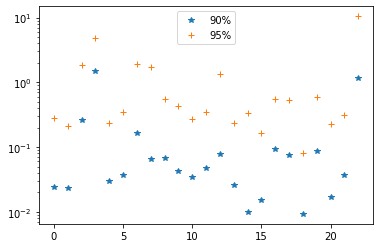

In [488]:
bt90 = np.array([np.percentile(bt,90) for bt in beta_1Msun])
bt95 = np.array([np.percentile(bt,95) for bt in beta_1Msun])

plt.semilogy(bt90*1e4,'*',label='90%')
plt.semilogy(bt95*1e4,'+',label='95%')

plt.legend()

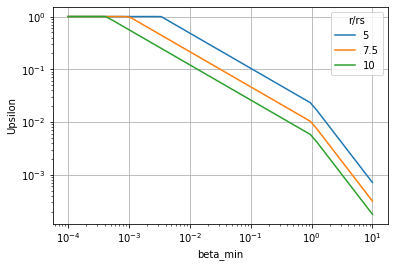

In [505]:
def Upsilon(bt_min,r_src,n0=-2/3.,n1=-1.5,bt_cut = np.infty):
    '''fraction of events with bt>bt_min
        r_src = distance in r_s
        approximated by min(1,A*bt_min^n0) (for bt_min <1)
                            A*bt_min^n1 (bt_min>1)
                        0 for bt_min>bt_cut ->TODO: replace by B_bt_min^-n1
                        
        TODO: coefficient computed by hand noticing that Upsilon(bt=1,r=7.5) = 1e-2
    '''
    A = 1e-2 #amplitude at bt_min = 1, r=7.5
    Ups = np.where(bt_min<1,A*(bt_min/1)**n0, A*(bt_min/1)**n1)*(7.5/r_src)**2
    Ups[Ups>=1] = 1
    
    return Ups

bt_min = np.geomspace(1e-4,1e1)
for  rs in [5,7.5,10]:
    plt.loglog(bt_min,Upsilon(bt_min,rs),label=rs)
    
plt.legend(title='r/rs')
plt.xlabel('beta_min')
plt.ylabel('Upsilon')
plt.grid()

In [542]:
def P_undetected(bt_max,f,M,r_src):
    '''probability of non-detection, multiplying individual calculations
       bt_max = limit to observations, for 1 solar mass
       M = mass [Msun]
       r = source radius [rs]
       f = fraction of events
    '''
    ups = Upsilon(bt_max*M, r_src)
    pi = (1-0.5*ups*f)
    Ptot = np.prod(pi)#np.exp(np.sum(np.log(pi)))
    return Ptot

vP_undetected = np.vectorize(P_undetected)

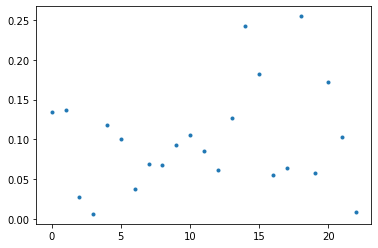

In [543]:
M=1e4
ups = Upsilon(bt90*M,5)

#plt.scatter(bt90*M,ups)
plt.plot(0.5*ups,'.')

#def Rate(bt_limits, M, r_src):
    

Text(0.5, 1.0, 'M=1.00e+04 M_sun (preliminary!)')

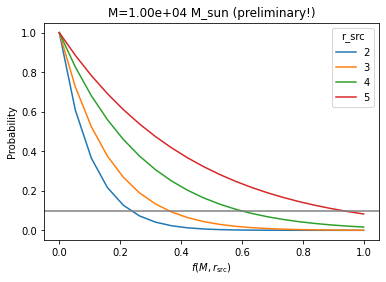

In [565]:
fs = np.linspace(0,1,20)

M=1e4

for r_src in [2,3,4,5]:
#r_src=5

    Ps = np.array([P_undetected(bt90,f,M,r_src) for f in fs])
    plt.plot(fs,Ps,label=r_src)
    
plt.legend(title='r_src')
plt.axhline(0.1,color='gray')
plt.xlabel(r'$f(M,r_{\rm src})$')
plt.ylabel('Probability')
plt.title('M=%.2e M_sun (preliminary!)'%M)

In [ ]:
def rate(beta_lim, M, r_src):
    P_vect =  0.5*ups(beta_lim*M,r_src)
    rate = np.

## $A_0$ plots

In [241]:
A0s = []

names = []
file_names =[]
for i, file in enumerate(files):
    A0 = utils.A0_from_liv_samples(join(loaddir, file))
    if A0 is not None:
        A0s.append(A0 * 1e20)
        names.append(names_all[i])
        file_names.append(file)



sort = np.argsort(names)
names = [names[i] for i in sort]
A0s = [A0s[i] for i in sort]
file_names = [file_names[i] for i in sort]

print(A0s)

[array([2.97419674e-18, 1.02519884e-04, 1.80215789e-12, ...,
       5.24229898e-16, 8.16633325e-20, 5.35169212e-09]), array([6.71608998e-25, 9.17855207e-17, 1.89500222e-12, ...,
       2.35947978e-12, 8.88158134e-23, 2.70003255e-16]), array([8.71279935e-14, 2.05850009e-19, 8.18122981e-06, ...,
       8.38579612e-18, 7.57799475e-09, 1.71554687e-18]), array([1.38944188e-18, 4.42015225e-08, 6.28312612e-19, ...,
       2.85237953e-19, 1.04856129e-15, 5.64307359e-14]), array([1.48367233e-11, 9.36446431e-03, 1.64083278e-09, ...,
       1.01819035e-15, 1.82981716e-07, 1.75128325e-03]), array([1.41370110e-15, 1.09133073e-11, 7.98384648e-14, ...,
       1.94034969e+00, 3.71875867e-12, 2.52371738e-05]), array([2.33674798e-24, 1.48343978e-12, 1.90851536e-09, ...,
       5.18517601e-15, 5.57020421e-16, 1.06799092e-25]), array([8.36604267e-11, 2.67521436e-25, 2.75017502e-10, ...,
       4.08569926e-19, 4.40403213e-10, 5.57216512e-18]), array([8.03301510e+00, 4.66288964e-02, 3.90625471e-05, ...,
   

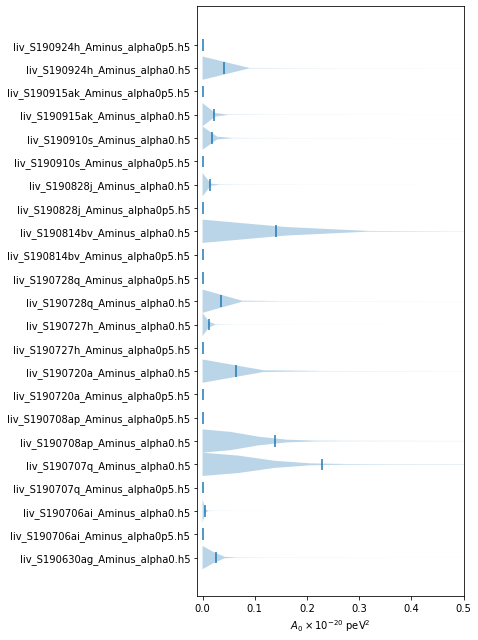

In [242]:
plt.figure(figsize=(9 * 0.75, 9))

plt.violinplot(np.abs(A0s), showmeans=True, vert=False, showextrema=False, widths=1)
yticks = np.arange(1, len(names) + 1)
plt.yticks(yticks, file_names)
plt.xlim(-.01, 0.5)

plt.xlabel(r"$A_0 \times 10^{-20}~\mathrm{peV}^2$")
plt.tight_layout()
#plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

In [ ]:
Mpc

In [ ]:
from scipy.constants import e

In [ ]:
1 * e 